In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [40]:
models = ["gemma2","gemma2:2b","llama3.1","llama3.2","phi3:medium","phi3"]
corpus=["RTEGLUE","Scitail"]
ruta="../"

In [41]:
todos=pd.DataFrame()
for m in models:
    for c in corpus:
        data_results1=pd.read_pickle(ruta+m+"/"+c+"/answers/cv1/results.pickle")
        data_results2=pd.read_pickle(ruta+m+"/"+c+"/answers/cv2/results.pickle")
        data_results3=pd.read_pickle(ruta+m+"/"+c+"/answers/cv3/results.pickle")
        data_results4=pd.read_pickle(ruta+m+"/"+c+"/answers/cv4/results.pickle")
        data_results5=pd.read_pickle(ruta+m+"/"+c+"/answers/cv5/results.pickle")
        data_results=pd.concat([data_results1,data_results2,data_results3,data_results4,data_results5],axis=0)
        temp = data_results[["group","accuracy","Entail_f1","Contra_f1"]].groupby(by=["group"]).mean()
        temp["model"]=m
        temp["corpus"]=c
        if m=="gemma2:2b":
            temp["orden"]=1
        elif m=="gemma2":
            temp["orden"]=2
        elif m=="llama3.2":
            temp["orden"]=3
        elif m=="llama3.1":
            temp["orden"]=4
        elif m=="phi3":
            temp["orden"]=5
        elif m=="phi3:medium":
            temp["orden"]=6
        todos=pd.concat([todos,temp],axis=0)
todos

,accuracy,Entail_f1,Contra_f1,model,corpus,orden
group,,,,,,
"(G1, G2)",0.87800,0.883359,0.871985,gemma2,RTEGLUE,2
"(G1, G2, G3)",0.87620,0.879782,0.872182,gemma2,RTEGLUE,2
"(G1, G2, G4)",0.88040,0.884889,0.875402,gemma2,RTEGLUE,2
"(G1, G3)",0.87710,0.881573,0.872060,gemma2,RTEGLUE,2
"(G1, G3, G4)",0.87930,0.884385,0.873558,gemma2,RTEGLUE,2
...,...,...,...,...,...,...
G3,0.84485,0.844795,0.844809,phi3,Scitail,5
G4,0.82790,0.841331,0.811881,phi3,Scitail,5
GS_DT,0.83980,0.841837,0.837445,phi3,Scitail,5


In [42]:
todos_s=todos[todos.index.isin(["G1","G2","G3","G4","Base"])]
todos_s

,accuracy,Entail_f1,Contra_f1,model,corpus,orden
group,,,,,,
Base,0.876326,0.885128,0.865933,gemma2,RTEGLUE,2
G1,0.878052,0.883069,0.872450,gemma2,RTEGLUE,2
G2,0.870729,0.879468,0.860426,gemma2,RTEGLUE,2
G3,0.872688,0.874411,0.870781,gemma2,RTEGLUE,2
G4,0.877370,0.884397,0.869221,gemma2,RTEGLUE,2
Base,0.800600,0.825044,0.768162,gemma2,Scitail,2
G1,0.845614,0.856940,0.832289,gemma2,Scitail,2
G2,0.817700,0.835023,0.796240,gemma2,Scitail,2
G3,0.845367,0.847288,0.843307,gemma2,Scitail,2


In [43]:
todos_s["gs"]=todos_s.index
todos_s=todos_s.reset_index(drop=False)

/tmp/ipykernel_3484349/1275029646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  todos_s["gs"]=todos_s.index


In [1]:
mi_conjunto = {1, 2, 3, 4, 5}

In [5]:
mi_conjunto.pop()

2

In [6]:
mi_conjunto

{3, 4, 5}

In [44]:
todos_s

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden,gs
0,Base,0.876326,0.885128,0.865933,gemma2,RTEGLUE,2,Base
1,G1,0.878052,0.883069,0.872450,gemma2,RTEGLUE,2,G1
2,G2,0.870729,0.879468,0.860426,gemma2,RTEGLUE,2,G2
3,G3,0.872688,0.874411,0.870781,gemma2,RTEGLUE,2,G3
4,G4,0.877370,0.884397,0.869221,gemma2,RTEGLUE,2,G4
5,Base,0.800600,0.825044,0.768162,gemma2,Scitail,2,Base
6,G1,0.845614,0.856940,0.832289,gemma2,Scitail,2,G1
7,G2,0.817700,0.835023,0.796240,gemma2,Scitail,2,G2
8,G3,0.845367,0.847288,0.843307,gemma2,Scitail,2,G3
9,G4,0.836150,0.849215,0.820527,gemma2,Scitail,2,G4


In [45]:
todos_s = todos_s.rename(columns={'model': 'models'})
todos_s = todos_s.rename(columns={'group': 'groups'})
todos_s = todos_s.rename(columns={'accuracy': 'Avg. Accuracy'})
todos_s

,groups,Avg. Accuracy,Entail_f1,Contra_f1,models,corpus,orden,gs
0,Base,0.876326,0.885128,0.865933,gemma2,RTEGLUE,2,Base
1,G1,0.878052,0.883069,0.872450,gemma2,RTEGLUE,2,G1
2,G2,0.870729,0.879468,0.860426,gemma2,RTEGLUE,2,G2
3,G3,0.872688,0.874411,0.870781,gemma2,RTEGLUE,2,G3
4,G4,0.877370,0.884397,0.869221,gemma2,RTEGLUE,2,G4
5,Base,0.800600,0.825044,0.768162,gemma2,Scitail,2,Base
6,G1,0.845614,0.856940,0.832289,gemma2,Scitail,2,G1
7,G2,0.817700,0.835023,0.796240,gemma2,Scitail,2,G2
8,G3,0.845367,0.847288,0.843307,gemma2,Scitail,2,G3
9,G4,0.836150,0.849215,0.820527,gemma2,Scitail,2,G4


In [46]:
todos_s["size"]=100
todos_s = todos_s.sort_values(['orden','groups'])

In [47]:
todos_s_scitail= todos_s[todos_s["corpus"]=="Scitail"]

In [48]:
markers = {"G1": "s", "G2": "X","G3": "d","G4": ">","Base":"o"}
hue_order = ["G1","G2","G3","G4","Base"]
color = ["Blue", "Red", "Orange","grey","black"]

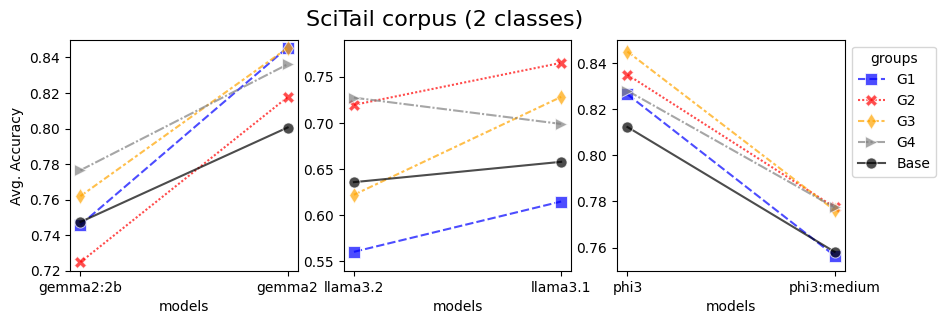

In [49]:
fig, axs = plt.subplots(ncols=3,figsize=(10, 3))
ax1 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["gemma2","gemma2:2b"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[0],legend=False,linewidth = 1.5)
ax2 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["llama3.1","llama3.2"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[1],legend=False,linewidth = 1.5)
ax3 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["phi3:medium","phi3"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[2],linewidth = 1.5)
ax1.set_ylim(0.72,0.85)
ax2.set_ylabel("")
ax2.set_ylim(0.54,0.79)
ax3.set_ylabel("")
ax3.set_ylim(0.75,0.85)
fig.suptitle('SciTail corpus (2 classes)', fontsize=16)
#sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
fig.figure.savefig('imgs/groups_base_Scitail.png',bbox_inches='tight',dpi=300)

In [50]:
todos_s_rteglue= todos_s[todos_s["corpus"]=="RTEGLUE"]

In [51]:
markers = {"G1": "s", "G2": "X","G3": "d","G4": ">","Base":"o"}
hue_order = ["G1","G2","G3","G4","Base"]


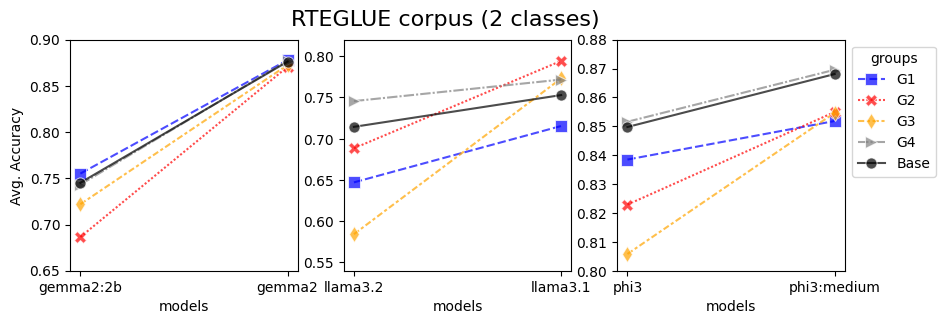

In [52]:
fig, axs = plt.subplots(ncols=3,figsize=(10, 3))
ax1 = sns.lineplot(data=todos_s_rteglue[todos_s_rteglue["models"].isin(["gemma2","gemma2:2b"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[0],legend=False,linewidth = 1.5)
ax2 = sns.lineplot(data=todos_s_rteglue[todos_s_rteglue["models"].isin(["llama3.1","llama3.2"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[1],legend=False,linewidth = 1.5)
ax3 = sns.lineplot(data=todos_s_rteglue[todos_s_rteglue["models"].isin(["phi3:medium","phi3"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[2],linewidth = 1.5)
ax1.set_ylim(0.65,0.9)
ax2.set_ylabel("")
ax2.set_ylim(0.54,0.82)
ax3.set_ylabel("")
ax3.set_ylim(0.8,0.88)
fig.suptitle('RTEGLUE corpus (2 classes)', fontsize=16)
#sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
fig.figure.savefig('imgs/groups_base_RTEGLUE.png',bbox_inches='tight',dpi=300)

# corpus 3 class

In [53]:
models = ["gemma2","gemma2:2b","llama3.1","llama3.2","phi3:medium","phi3"]
corpus=["SNLI","SICK"]
ruta="../"

In [54]:
todos_s=pd.DataFrame()
for m in models:
    for c in corpus:
        data_results1=pd.read_pickle(ruta+m+"/"+c+"/answers/cv1/results.pickle")
        data_results2=pd.read_pickle(ruta+m+"/"+c+"/answers/cv2/results.pickle")
        data_results3=pd.read_pickle(ruta+m+"/"+c+"/answers/cv3/results.pickle")
        data_results4=pd.read_pickle(ruta+m+"/"+c+"/answers/cv4/results.pickle")
        data_results5=pd.read_pickle(ruta+m+"/"+c+"/answers/cv5/results.pickle")
        data_results=pd.concat([data_results1,data_results2,data_results3,data_results4,data_results5],axis=0)
        temp = data_results[["group","accuracy","Entail_f1","Neutral_f1","Contra_f1"]].groupby(by=["group"]).mean()
        temp["model"]=m
        temp["corpus"]=c
        if m=="gemma2:2b":
            temp["orden"]=1
        elif m=="gemma2":
            temp["orden"]=2
        elif m=="llama3.2":
            temp["orden"]=3
        elif m=="llama3.1":
            temp["orden"]=4
        elif m=="phi3":
            temp["orden"]=5
        elif m=="phi3:medium":
            temp["orden"]=6
        todos_s=pd.concat([todos_s,temp],axis=0)
todos_s

,accuracy,Entail_f1,Neutral_f1,Contra_f1,model,corpus,orden
group,,,,,,,
"(G1, G2)",0.699400,0.854429,0.646394,0.569342,gemma2,SNLI,2
"(G1, G2, G3)",0.707233,0.857067,0.650854,0.591180,gemma2,SNLI,2
"(G1, G2, G4)",0.705000,0.864626,0.648312,0.569542,gemma2,SNLI,2
"(G1, G3)",0.676033,0.853810,0.630810,0.492804,gemma2,SNLI,2
"(G1, G3, G4)",0.681933,0.864696,0.629829,0.495572,gemma2,SNLI,2
...,...,...,...,...,...,...,...
G3,0.805333,0.843805,0.714945,0.854527,phi3,SICK,5
G4,0.852501,0.896422,0.779400,0.878773,phi3,SICK,5
GS_DT,0.867067,0.908154,0.799588,0.889496,phi3,SICK,5


In [55]:
todos_s=todos_s[todos_s.index.isin(["G1","G2","G3","G4","Base"])]
todos_s

,accuracy,Entail_f1,Neutral_f1,Contra_f1,model,corpus,orden
group,,,,,,,
Base,0.642400,0.860962,0.591426,0.364744,gemma2,SNLI,2
G1,0.629860,0.857526,0.598156,0.306955,gemma2,SNLI,2
G2,0.687849,0.844535,0.617654,0.569382,gemma2,SNLI,2
G3,0.673400,0.845403,0.638839,0.490859,gemma2,SNLI,2
G4,0.637500,0.869484,0.596915,0.315221,gemma2,SNLI,2
Base,0.879667,0.917832,0.820503,0.899359,gemma2,SICK,2
G1,0.880667,0.904709,0.823999,0.913316,gemma2,SICK,2
G2,0.861133,0.915378,0.770384,0.884510,gemma2,SICK,2
G3,0.864133,0.907360,0.789958,0.890688,gemma2,SICK,2


In [56]:
todos_s["gs"]=todos_s.index
todos_s=todos_s.reset_index(drop=False)

/tmp/ipykernel_3484349/1275029646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  todos_s["gs"]=todos_s.index


In [57]:
todos_s = todos_s.rename(columns={'model': 'models'})
todos_s = todos_s.rename(columns={'group': 'groups'})
todos_s = todos_s.rename(columns={'accuracy': 'Avg. Accuracy'})
todos_s

,groups,Avg. Accuracy,Entail_f1,Neutral_f1,Contra_f1,models,corpus,orden,gs
0,Base,0.642400,0.860962,0.591426,0.364744,gemma2,SNLI,2,Base
1,G1,0.629860,0.857526,0.598156,0.306955,gemma2,SNLI,2,G1
2,G2,0.687849,0.844535,0.617654,0.569382,gemma2,SNLI,2,G2
3,G3,0.673400,0.845403,0.638839,0.490859,gemma2,SNLI,2,G3
4,G4,0.637500,0.869484,0.596915,0.315221,gemma2,SNLI,2,G4
5,Base,0.879667,0.917832,0.820503,0.899359,gemma2,SICK,2,Base
6,G1,0.880667,0.904709,0.823999,0.913316,gemma2,SICK,2,G1
7,G2,0.861133,0.915378,0.770384,0.884510,gemma2,SICK,2,G2
8,G3,0.864133,0.907360,0.789958,0.890688,gemma2,SICK,2,G3
9,G4,0.891133,0.920401,0.839115,0.912837,gemma2,SICK,2,G4


In [58]:
todos_s["size"]=100
todos_s = todos_s.sort_values(['orden','groups'])

In [59]:
todos_s_scitail= todos_s[todos_s["corpus"]=="SNLI"]

In [60]:
markers = {"G1": "s", "G2": "X","G3": "d","G4": ">","Base":"o"}
hue_order = ["G1","G2","G3","G4","Base"]


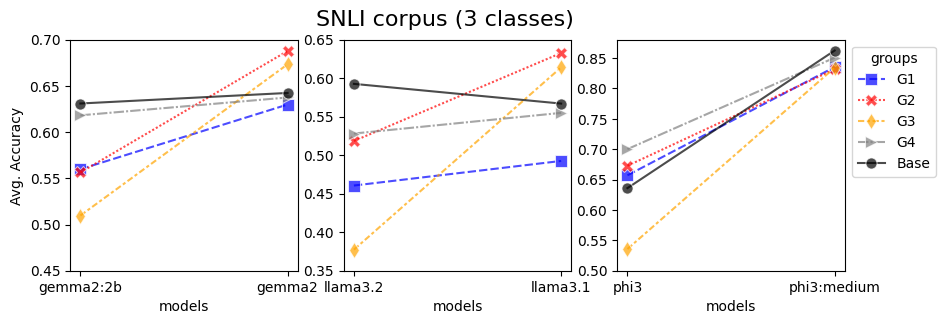

In [61]:
fig, axs = plt.subplots(ncols=3,figsize=(10, 3))
ax1 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["gemma2","gemma2:2b"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[0],legend=False,linewidth = 1.5)
ax2 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["llama3.1","llama3.2"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[1],legend=False,linewidth = 1.5)
ax3 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["phi3:medium","phi3"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[2],linewidth = 1.5)
ax1.set_ylim(0.45,0.7)
ax2.set_ylabel("")
ax2.set_ylim(0.35,0.65)
ax3.set_ylabel("")
ax3.set_ylim(0.5,0.88)
fig.suptitle('SNLI corpus (3 classes)', fontsize=16)
#sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
fig.figure.savefig('imgs/groups_base_SNLI.png',bbox_inches='tight',dpi=300)

In [62]:
todos_s_scitail= todos_s[todos_s["corpus"]=="SICK"]

In [63]:
markers = {"G1": "s", "G2": "X","G3": "d","G4": ">","Base":"o"}
hue_order = ["G1","G2","G3","G4","Base"]


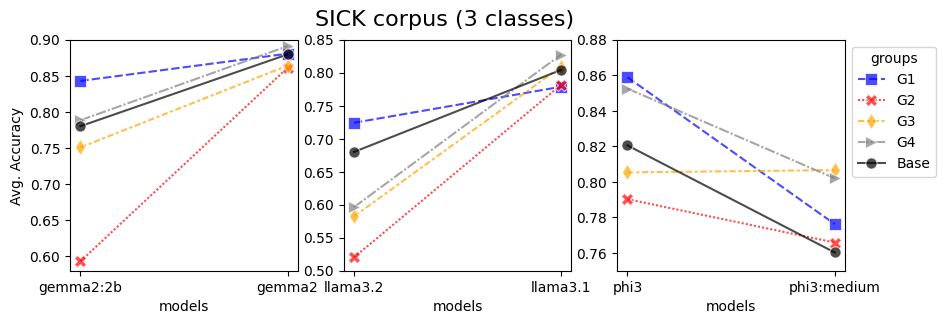

In [64]:
fig, axs = plt.subplots(ncols=3,figsize=(10, 3))
ax1 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["gemma2","gemma2:2b"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[0],legend=False,linewidth = 1.5)
ax2 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["llama3.1","llama3.2"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[1],legend=False,linewidth = 1.5)
ax3 = sns.lineplot(data=todos_s_scitail[todos_s_scitail["models"].isin(["phi3:medium","phi3"])], y="Avg. Accuracy", x="models",hue="groups",style="groups",hue_order=hue_order, markers=markers,alpha=0.7,palette=color,markersize=8,ax=axs[2],linewidth = 1.5)
ax1.set_ylim(0.58,0.9)
ax2.set_ylabel("")
ax2.set_ylim(0.5,0.85)
ax3.set_ylabel("")
ax3.set_ylim(0.75,0.88)
fig.suptitle('SICK corpus (3 classes)', fontsize=16)
#sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))
fig.figure.savefig('imgs/groups_base_SICK.png',bbox_inches='tight',dpi=300)

In [78]:
models = ["gemma2","gemma2:2b","llama3.1","llama3.2","phi3:medium","phi3"]
corpus=["RTEGLUE","Scitail"]
ruta="../"
todos=pd.DataFrame()
for m in models:
    for c in corpus:
        data_results1=pd.read_pickle(ruta+m+"/"+c+"/answers/cv1/results.pickle")
        data_results2=pd.read_pickle(ruta+m+"/"+c+"/answers/cv2/results.pickle")
        data_results3=pd.read_pickle(ruta+m+"/"+c+"/answers/cv3/results.pickle")
        data_results4=pd.read_pickle(ruta+m+"/"+c+"/answers/cv4/results.pickle")
        data_results5=pd.read_pickle(ruta+m+"/"+c+"/answers/cv5/results.pickle")
        data_results=pd.concat([data_results1,data_results2,data_results3,data_results4,data_results5],axis=0)
        temp = data_results[["group","accuracy","Entail_f1","Contra_f1"]]
        temp["model"]=m
        temp["corpus"]=c
        if m=="gemma2:2b":
            temp["orden"]=1
        elif m=="gemma2":
            temp["orden"]=2
        elif m=="llama3.2":
            temp["orden"]=3
        elif m=="llama3.1":
            temp["orden"]=4
        elif m=="phi3":
            temp["orden"]=5
        elif m=="phi3:medium":
            temp["orden"]=6
        todos=pd.concat([todos,temp],axis=0)
todos

/tmp/ipykernel_3484349/3161849278.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["model"]=m
/tmp/ipykernel_3484349/3161849278.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["corpus"]=c
/tmp/ipykernel_3484349/3161849278.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.885000,0.894977,0.872928,gemma2,RTEGLUE,2
1,CoT,0.885000,0.893023,0.875676,gemma2,RTEGLUE,2
2,AoT,0.873737,0.875622,0.871795,gemma2,RTEGLUE,2
3,AoT_FS,0.860000,0.860000,0.860000,gemma2,RTEGLUE,2
4,VM,0.885000,0.889952,0.879581,gemma2,RTEGLUE,2
...,...,...,...,...,...,...,...
205,"(G1, G3)",0.852500,0.859189,0.845144,phi3,Scitail,5
206,"(G1, G4)",0.830000,0.843318,0.814208,phi3,Scitail,5
207,"(G2, G3)",0.852500,0.857831,0.846753,phi3,Scitail,5
208,"(G2, G4)",0.840000,0.851852,0.826087,phi3,Scitail,5


#graficas

In [79]:
todos

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.885000,0.894977,0.872928,gemma2,RTEGLUE,2
1,CoT,0.885000,0.893023,0.875676,gemma2,RTEGLUE,2
2,AoT,0.873737,0.875622,0.871795,gemma2,RTEGLUE,2
3,AoT_FS,0.860000,0.860000,0.860000,gemma2,RTEGLUE,2
4,VM,0.885000,0.889952,0.879581,gemma2,RTEGLUE,2
...,...,...,...,...,...,...,...
205,"(G1, G3)",0.852500,0.859189,0.845144,phi3,Scitail,5
206,"(G1, G4)",0.830000,0.843318,0.814208,phi3,Scitail,5
207,"(G2, G3)",0.852500,0.857831,0.846753,phi3,Scitail,5
208,"(G2, G4)",0.840000,0.851852,0.826087,phi3,Scitail,5


In [84]:
todos_s=todos[todos["group"].isin(["Base","GS_DT","VM","WVM"])]
todos_s

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.8850,0.894977,0.872928,gemma2,RTEGLUE,2
4,VM,0.8850,0.889952,0.879581,gemma2,RTEGLUE,2
5,WVM,0.8800,0.884615,0.875000,gemma2,RTEGLUE,2
6,GS_DT,0.8950,0.897561,0.892308,gemma2,RTEGLUE,2
21,Base,0.8550,0.861244,0.848168,gemma2,RTEGLUE,2
...,...,...,...,...,...,...,...
174,GS_DT,0.8625,0.864198,0.860759,phi3,Scitail,5
189,Base,0.8275,0.847007,0.802292,phi3,Scitail,5
193,VM,0.8350,0.847926,0.819672,phi3,Scitail,5
194,WVM,0.8450,0.855814,0.832432,phi3,Scitail,5


In [85]:
todos_s

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.8850,0.894977,0.872928,gemma2,RTEGLUE,2
4,VM,0.8850,0.889952,0.879581,gemma2,RTEGLUE,2
5,WVM,0.8800,0.884615,0.875000,gemma2,RTEGLUE,2
6,GS_DT,0.8950,0.897561,0.892308,gemma2,RTEGLUE,2
21,Base,0.8550,0.861244,0.848168,gemma2,RTEGLUE,2
...,...,...,...,...,...,...,...
174,GS_DT,0.8625,0.864198,0.860759,phi3,Scitail,5
189,Base,0.8275,0.847007,0.802292,phi3,Scitail,5
193,VM,0.8350,0.847926,0.819672,phi3,Scitail,5
194,WVM,0.8450,0.855814,0.832432,phi3,Scitail,5


In [86]:
tod_scitail=todos_s[todos_s["corpus"]=="Scitail"]

/tmp/ipykernel_3484349/1856100335.py:8: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)


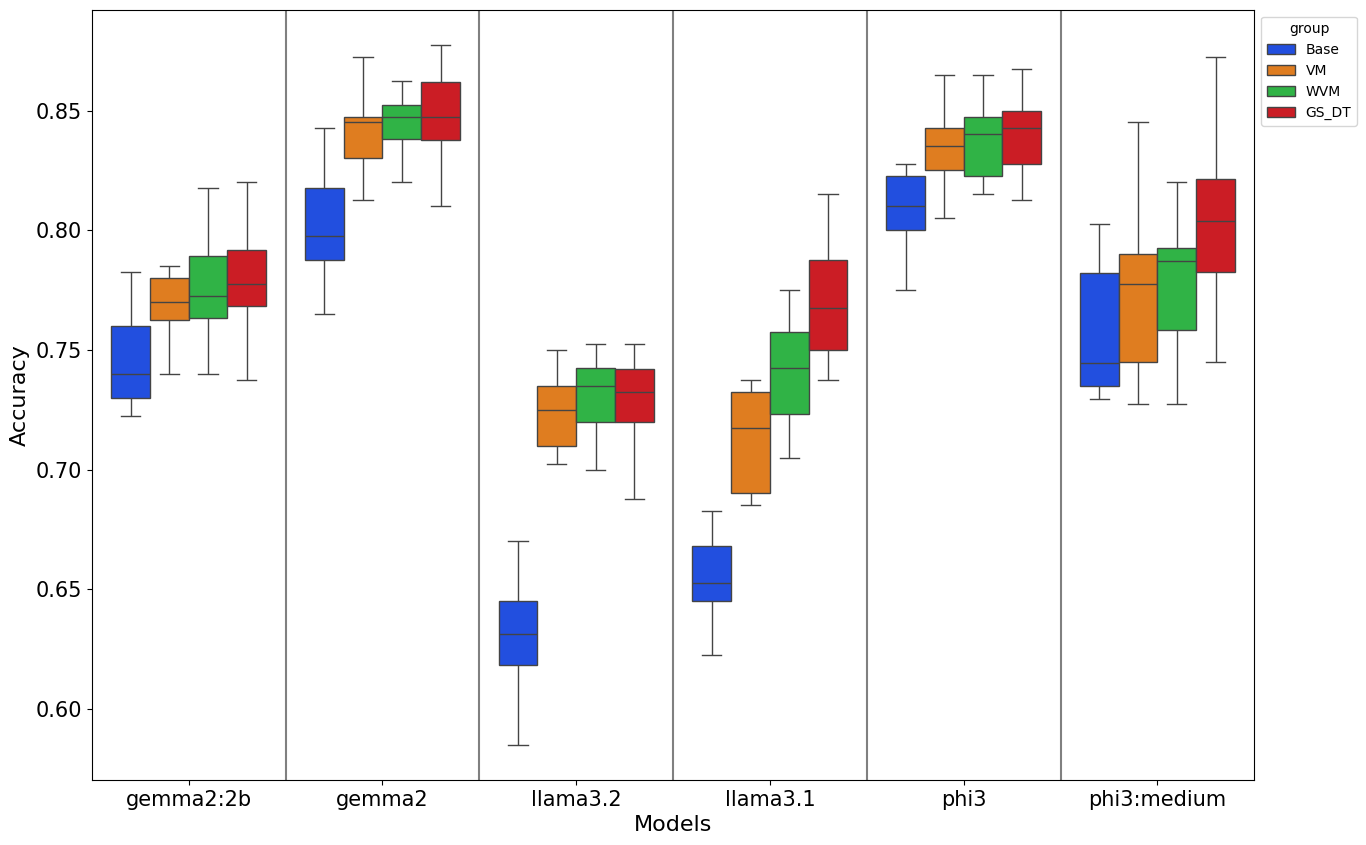

In [87]:
dataframe_order = tod_scitail.sort_values(['orden','model'])
fig, ax = plt.subplots(figsize = (15, 10))
order = ["Base","VM","WVM","GS_DT"]
hue_order = ["Base","VM","WVM","GS_DT"]
qual_palette = sns.color_palette("bright", 7)

#plot=sns.boxplot(x = "grupo", y = 'f1_score', data=data_frame, hue = 'definicion',order=order,hue_order=hue_order,palette=qual_palette,showfliers=False)
plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)

plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=16)

plt.axvline(0.5,color = "grey")
plt.axvline(1.5,color = "grey")
plt.axvline(2.5,color = "grey")
plt.axvline(3.5,color = "grey")
plt.axvline(4.5,color = "grey")
#plt.title("Comparación de accuracy de modelos Base vs WVM\nScitail",fontsize = 20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.figure.savefig('imgs/vm_wvm_dt_scitail.png',bbox_inches='tight',dpi=300)

/tmp/ipykernel_3484349/3216043741.py:9: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)


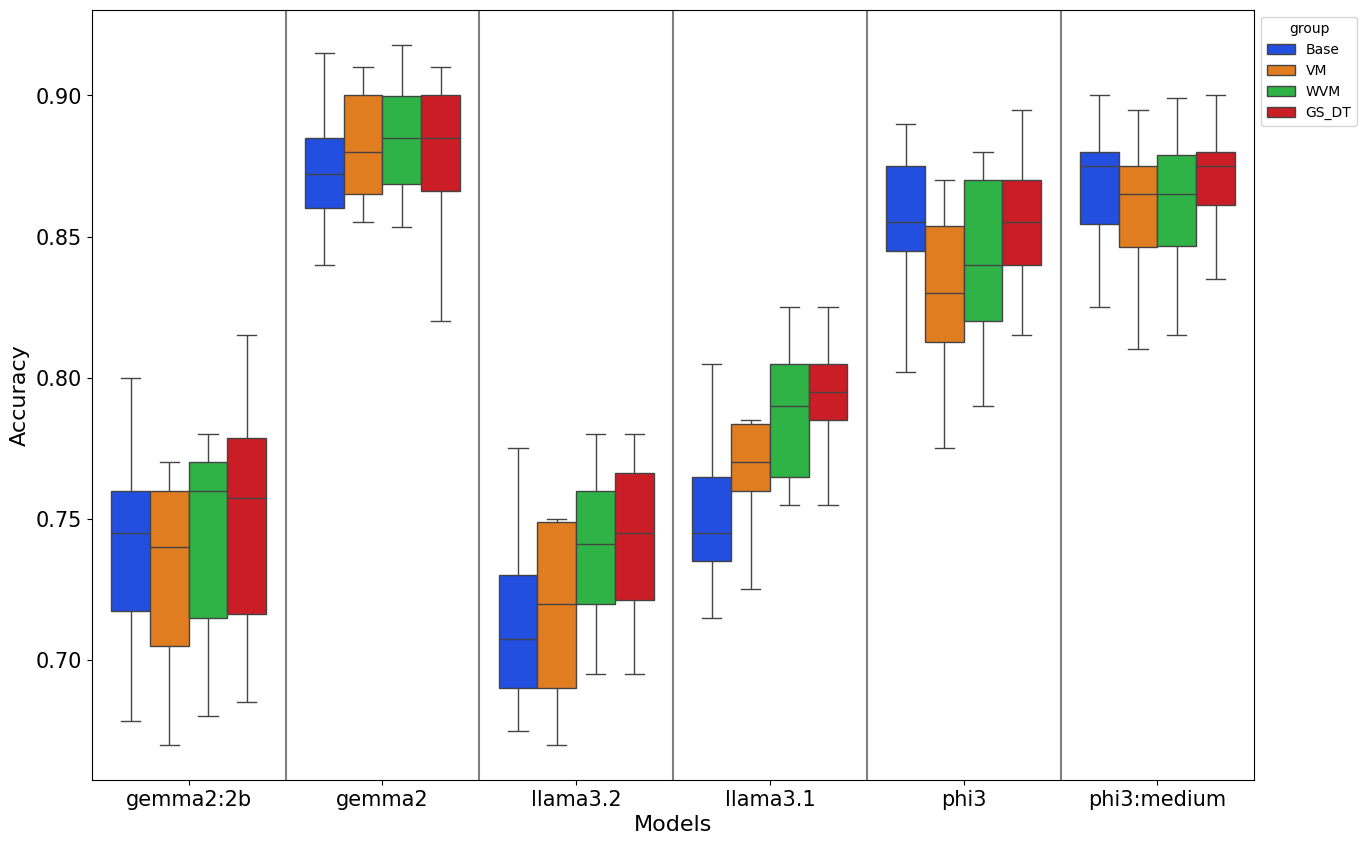

In [88]:
tod_scitail=todos_s[todos_s["corpus"]=="RTEGLUE"]
dataframe_order = tod_scitail.sort_values(['orden','model'])
fig, ax = plt.subplots(figsize = (15, 10))
order = ["Base","VM","WVM","GS_DT"]
hue_order = ["Base","VM","WVM","GS_DT"]
qual_palette = sns.color_palette("bright", 7)

#plot=sns.boxplot(x = "grupo", y = 'f1_score', data=data_frame, hue = 'definicion',order=order,hue_order=hue_order,palette=qual_palette,showfliers=False)
plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)

plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=16)

plt.axvline(0.5,color = "grey")
plt.axvline(1.5,color = "grey")
plt.axvline(2.5,color = "grey")
plt.axvline(3.5,color = "grey")
plt.axvline(4.5,color = "grey")
#plt.title("Comparación de accuracy de modelos Base vs WVM\nScitail",fontsize = 20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.figure.savefig('imgs/vm_wvm_dt_RTEGLUE.png',bbox_inches='tight',dpi=300)

In [89]:
models = ["gemma2","gemma2:2b","llama3.1","llama3.2","phi3:medium","phi3"]
corpus=["SNLI","SICK"]
ruta="../"
todos=pd.DataFrame()
for m in models:
    for c in corpus:
        data_results1=pd.read_pickle(ruta+m+"/"+c+"/answers/cv1/results.pickle")
        data_results2=pd.read_pickle(ruta+m+"/"+c+"/answers/cv2/results.pickle")
        data_results3=pd.read_pickle(ruta+m+"/"+c+"/answers/cv3/results.pickle")
        data_results4=pd.read_pickle(ruta+m+"/"+c+"/answers/cv4/results.pickle")
        data_results5=pd.read_pickle(ruta+m+"/"+c+"/answers/cv5/results.pickle")
        data_results=pd.concat([data_results1,data_results2,data_results3,data_results4,data_results5],axis=0)
        temp = data_results[["group","accuracy","Entail_f1","Contra_f1"]]
        temp["model"]=m
        temp["corpus"]=c
        if m=="gemma2:2b":
            temp["orden"]=1
        elif m=="gemma2":
            temp["orden"]=2
        elif m=="llama3.2":
            temp["orden"]=3
        elif m=="llama3.1":
            temp["orden"]=4
        elif m=="phi3":
            temp["orden"]=5
        elif m=="phi3:medium":
            temp["orden"]=6
        todos=pd.concat([todos,temp],axis=0)
todos

/tmp/ipykernel_3484349/1789166440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["model"]=m
/tmp/ipykernel_3484349/1789166440.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["corpus"]=c
/tmp/ipykernel_3484349/1789166440.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.615000,0.839623,0.297872,gemma2,SNLI,2
1,CoT,0.615000,0.827586,0.325000,gemma2,SNLI,2
2,AoT,0.584175,0.770588,0.262009,gemma2,SNLI,2
3,AoT_FS,0.773333,0.847368,0.817391,gemma2,SNLI,2
4,VM,0.630000,0.846715,0.333333,gemma2,SNLI,2
...,...,...,...,...,...,...,...
205,"(G1, G3)",0.863333,0.893401,0.894231,phi3,SICK,5
206,"(G1, G4)",0.873333,0.895522,0.904762,phi3,SICK,5
207,"(G2, G3)",0.776667,0.771084,0.854460,phi3,SICK,5
208,"(G2, G4)",0.826667,0.861702,0.862222,phi3,SICK,5


In [90]:
todos

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.615000,0.839623,0.297872,gemma2,SNLI,2
1,CoT,0.615000,0.827586,0.325000,gemma2,SNLI,2
2,AoT,0.584175,0.770588,0.262009,gemma2,SNLI,2
3,AoT_FS,0.773333,0.847368,0.817391,gemma2,SNLI,2
4,VM,0.630000,0.846715,0.333333,gemma2,SNLI,2
...,...,...,...,...,...,...,...
205,"(G1, G3)",0.863333,0.893401,0.894231,phi3,SICK,5
206,"(G1, G4)",0.873333,0.895522,0.904762,phi3,SICK,5
207,"(G2, G3)",0.776667,0.771084,0.854460,phi3,SICK,5
208,"(G2, G4)",0.826667,0.861702,0.862222,phi3,SICK,5


In [91]:
todos_s=todos[todos["group"].isin(["Base","GS_DT","VM","WVM"])]
todos_s

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.615000,0.839623,0.297872,gemma2,SNLI,2
4,VM,0.630000,0.846715,0.333333,gemma2,SNLI,2
5,WVM,0.648333,0.841076,0.418972,gemma2,SNLI,2
6,GS_DT,0.693333,0.855746,0.548043,gemma2,SNLI,2
21,Base,0.643333,0.878719,0.330579,gemma2,SNLI,2
...,...,...,...,...,...,...,...
174,GS_DT,0.866667,0.914573,0.886792,phi3,SICK,5
189,Base,0.833333,0.862944,0.858537,phi3,SICK,5
193,VM,0.796667,0.824859,0.843049,phi3,SICK,5
194,WVM,0.836667,0.866310,0.867580,phi3,SICK,5


In [92]:
todos_s

,group,accuracy,Entail_f1,Contra_f1,model,corpus,orden
0,Base,0.615000,0.839623,0.297872,gemma2,SNLI,2
4,VM,0.630000,0.846715,0.333333,gemma2,SNLI,2
5,WVM,0.648333,0.841076,0.418972,gemma2,SNLI,2
6,GS_DT,0.693333,0.855746,0.548043,gemma2,SNLI,2
21,Base,0.643333,0.878719,0.330579,gemma2,SNLI,2
...,...,...,...,...,...,...,...
174,GS_DT,0.866667,0.914573,0.886792,phi3,SICK,5
189,Base,0.833333,0.862944,0.858537,phi3,SICK,5
193,VM,0.796667,0.824859,0.843049,phi3,SICK,5
194,WVM,0.836667,0.866310,0.867580,phi3,SICK,5


In [93]:
tod_scitail=todos_s[todos_s["corpus"]=="SNLI"]

/tmp/ipykernel_3484349/1823987629.py:8: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)


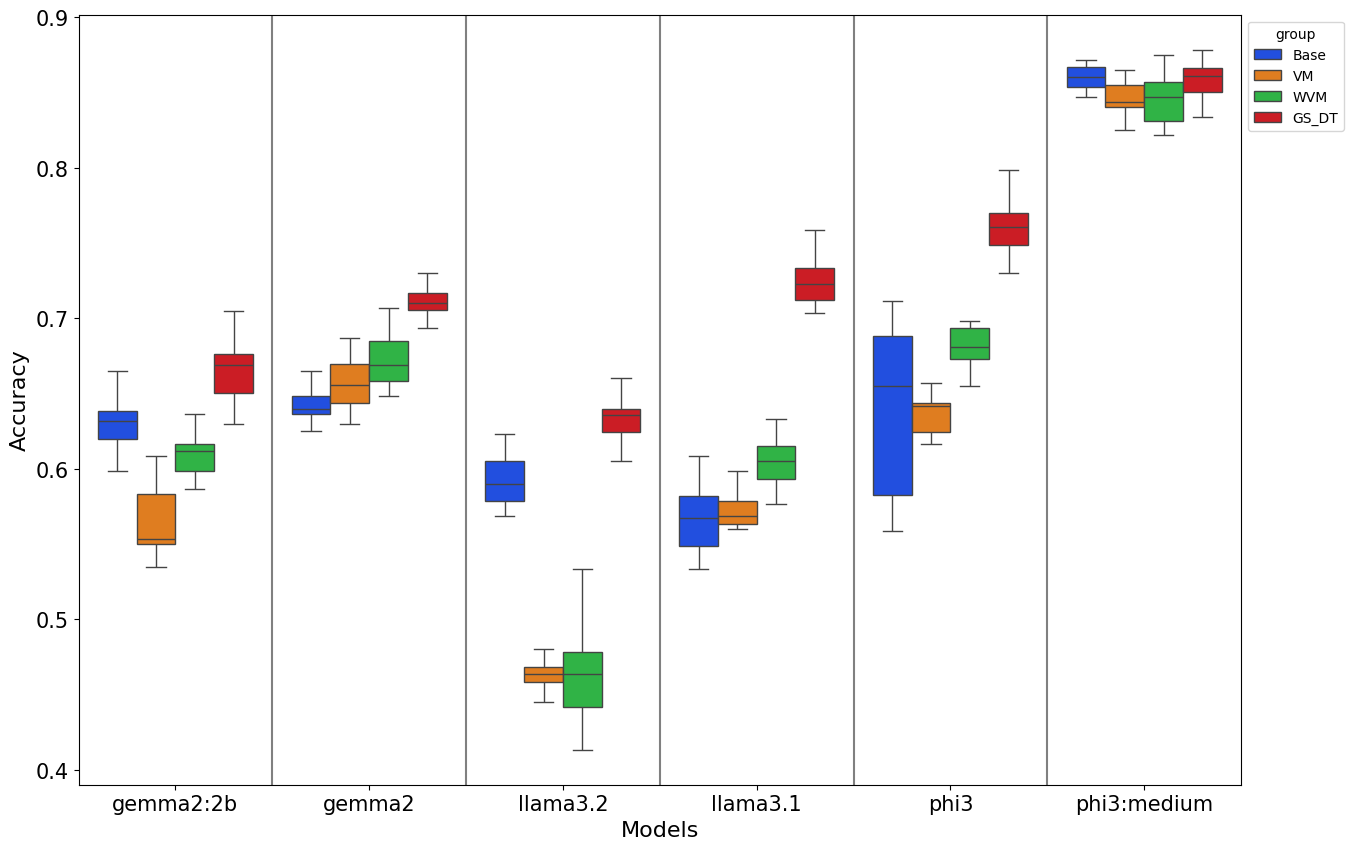

In [94]:
dataframe_order = tod_scitail.sort_values(['orden','model'])
fig, ax = plt.subplots(figsize = (15, 10))
order = ["Base","VM","WVM","GS_DT"]
hue_order = ["Base","VM","WVM","GS_DT"]
qual_palette = sns.color_palette("bright", 7)

#plot=sns.boxplot(x = "grupo", y = 'f1_score', data=data_frame, hue = 'definicion',order=order,hue_order=hue_order,palette=qual_palette,showfliers=False)
plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)

plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=16)

plt.axvline(0.5,color = "grey")
plt.axvline(1.5,color = "grey")
plt.axvline(2.5,color = "grey")
plt.axvline(3.5,color = "grey")
plt.axvline(4.5,color = "grey")
#plt.title("Comparación de accuracy de modelos Base vs WVM\nScitail",fontsize = 20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.figure.savefig('imgs/vm_wvm_dt_SNLI.png',bbox_inches='tight',dpi=300)

/tmp/ipykernel_3484349/549294825.py:9: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)


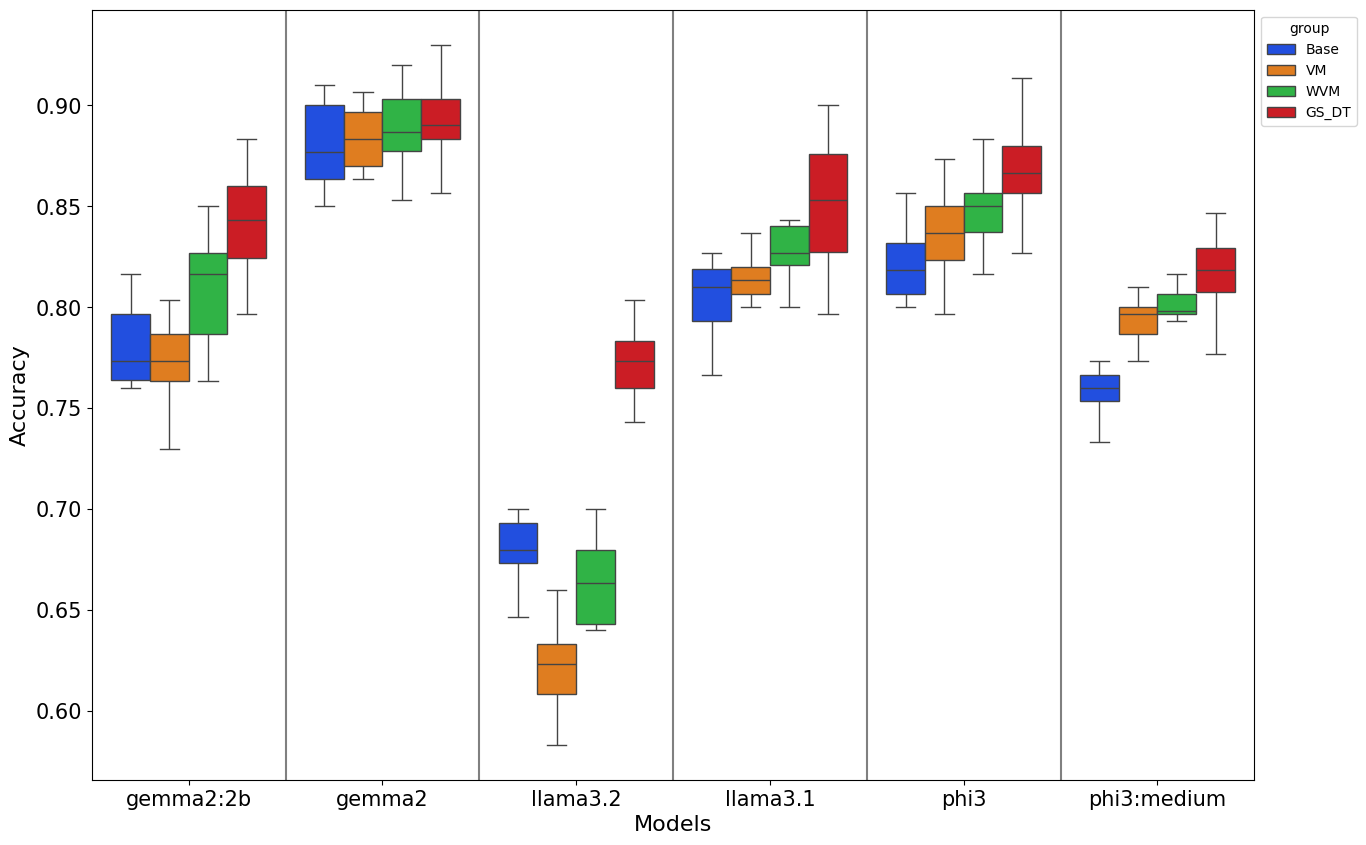

In [95]:
tod_scitail=todos_s[todos_s["corpus"]=="SICK"]
dataframe_order = tod_scitail.sort_values(['orden','model'])
fig, ax = plt.subplots(figsize = (15, 10))
order = ["Base","VM","WVM","GS_DT"]
hue_order = ["Base","VM","WVM","GS_DT"]
qual_palette = sns.color_palette("bright", 7)

#plot=sns.boxplot(x = "grupo", y = 'f1_score', data=data_frame, hue = 'definicion',order=order,hue_order=hue_order,palette=qual_palette,showfliers=False)
plot=sns.boxplot(x = "model", y = 'accuracy', data=dataframe_order,hue = 'group',hue_order=hue_order, palette=qual_palette,showfliers=False)

plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=16)

plt.axvline(0.5,color = "grey")
plt.axvline(1.5,color = "grey")
plt.axvline(2.5,color = "grey")
plt.axvline(3.5,color = "grey")
plt.axvline(4.5,color = "grey")
#plt.title("Comparación de accuracy de modelos Base vs WVM\nScitail",fontsize = 20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.figure.savefig('imgs/vm_wvm_dt_SICK.png',bbox_inches='tight',dpi=300)